In [301]:
#automatically reload stuff
%reload_ext autoreload
%autoreload 2
from SymptomPreprocessing import *
from SpatialPreprocessing import *
import Preprocessing as P
import Cluster
import Metrics
import re
import RPorts
import Utils
from warnings import simplefilter 
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.decomposition import PCA
from sklearn.calibration import CalibratedClassifierCV

simplefilter(action='ignore')
pd.set_option('display.max_rows', 1000)

In [2]:
rds = RadDataset()
rds.get_value_array(rds.dvh_df.columns,as_df=True)

spellchecking...
renaming things
filtering pateints
adding nan values for missing organs
adding histograms


,Esophagus_V55,Esophagus_D30,Esophagus_max_dose,Esophagus_D80,Esophagus_V10,Esophagus_V80,Esophagus_D85,Esophagus_V5,Esophagus_V40,Esophagus_D97,...,Glottic_Area_D65,Glottic_Area_D75,Glottic_Area_D45,Glottic_Area_min_dose,Glottic_Area_V35,Glottic_Area_V65,Glottic_Area_D70,Glottic_Area_D25,Glottic_Area_D10,Glottic_Area_V30
id,,,,,,,,,,,,,,,,,,,,,
2.0,1.211914,42.531250,5827.0,29.187500,91.562500,0.0,21.343750,96.375000,39.000000,4.710938,...,19.515625,17.796875,23.953125,1559.0,17.515625,0.000000,18.656250,30.906250,39.218750,27.234375
6.0,0.000000,40.375000,5088.0,6.699219,78.375000,0.0,4.390625,84.875000,32.437500,2.189453,...,31.375000,30.656250,32.593750,2781.0,23.296875,0.000000,31.093750,34.656250,39.968750,83.000000
7.0,0.000000,33.125000,4362.0,5.000000,70.312500,0.0,3.960938,80.062500,1.930664,0.020004,...,28.625000,28.265625,29.062500,2733.0,0.000000,0.000000,28.390625,29.906250,30.656250,22.828125
8.0,0.000000,29.937500,3401.0,6.691406,61.531250,0.0,6.320312,95.437500,0.000000,4.468750,...,10.390625,9.617188,14.000000,664.0,0.000000,0.000000,9.812500,15.312500,27.687500,0.000000
9.0,4.335938,41.281250,5963.0,22.515625,100.000000,0.0,20.484375,100.000000,32.968750,14.562500,...,6.281250,6.089844,15.671875,554.0,0.000000,0.000000,6.218750,21.531250,27.296875,4.316406
10.0,0.000000,38.906250,5181.0,7.660156,75.187500,0.0,6.511719,91.562500,26.921875,3.869141,...,37.781250,33.812500,42.343750,2475.0,72.125000,7.339844,35.718750,53.656250,58.125000,88.875000
11.0,0.000000,19.750000,2900.0,6.730469,42.812500,0.0,6.539062,100.000000,0.000000,6.148438,...,10.820312,10.179688,12.609375,754.0,0.000000,0.000000,10.750000,18.234375,19.421875,4.761719
12.0,0.000000,1.940430,610.0,0.700195,0.000000,0.0,0.600098,0.981445,0.000000,0.010002,...,2.039062,1.849609,6.101562,144.0,0.981934,0.000000,1.940430,12.781250,22.703125,3.755859
13.0,0.000000,40.656250,4343.0,14.031250,80.625000,0.0,5.871094,86.437500,38.781250,0.020004,...,9.367188,8.328125,10.796875,587.0,0.000000,0.000000,8.757812,15.046875,21.390625,0.000000


In [7]:
def rds_to_df(rds):
    sd_df = P.get_merged_symp_dose_df(rds,roll_up=True)
    sd_df = P.get_symptoms_max(sd_df)
    sd_df =  P.add_sd_dose_clusters(sd_df)
    sd_df = P.add_sd_symptom_clusters(sd_df)
    return sd_df
sddf = rds_to_df(rds)
sddf

before drop count 823
after drop count 535
error (%) 0.7424412531907885
[('severe_6wk_symptoms', 0.009345794392523364), ('severe_late_symptoms', 0.014953271028037384), ('moderate_6wk_symptoms', 0.052336448598130844), ('moderate_late_symptoms', 0.04672897196261682), ('mild_6wk_symptoms', 0.19626168224299065), ('mild_late_symptoms', 0.17009345794392525)]
dose ids: 484 syptom ids: 535 merged ids: 349
using default similarity


,D10,D15,D2,D20,D25,D30,D35,D40,D45,D5,...,symptoms_work_max_all,symptoms_work_max_treatment,symptoms_work_max_post,symptoms_work_max_late,symptoms_work_max_change_all,symptoms_work_max_change_treatment,symptoms_work_max_change_post,symptoms_work_max_change_late,dose_clusters,symptom_clusters
id,,,,,,,,,,,,,,,,,,,,,
7,"[37.625, 37.15625, 60.3125, 66.3125, 49.4375, ...","[36.5625, 36.75, 59.96875, 64.0625, 48.375, 49...","[39.96875, 38.0625, 60.90625, 71.8125, 52.1562...","[35.25, 36.34375, 59.71875, 62.71875, 47.34375...","[34.0625, 35.90625, 59.40625, 61.53125, 46.562...","[33.125, 35.5, 59.1875, 60.34375, 45.6875, 43....","[32.28125, 35.03125, 58.90625, 59.03125, 44.75...","[31.609375, 34.625, 58.625, 57.71875, 43.96875...","[30.84375, 34.1875, 58.3125, 56.40625, 43.1875...","[38.6875, 37.625, 60.625, 71.0625, 50.75, 53.8...",...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2
8,"[32.15625, 32.0625, 56.6875, 65.375, 22.5, 31....","[31.703125, 31.109375, 55.75, 63.34375, 21.312...","[33.4375, 34.09375, 58.28125, 68.75, 33.6875, ...","[31.203125, 30.25, 54.5625, 61.34375, 17.84375...","[30.609375, 29.40625, 52.375, 60.03125, 14.367...","[29.9375, 28.390625, 50.5625, 59.5, 13.140625,...","[28.96875, 27.453125, 49.46875, 58.96875, 11.7...","[27.1875, 26.46875, 48.59375, 58.53125, 11.203...","[24.875, 25.453125, 48.0, 58.125, 10.9609375, ...","[32.78125, 33.125, 57.65625, 67.375, 25.3125, ...",...,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,3,2
9,"[51.4375, 27.515625, 51.4375, 51.4375, 18.6875...","[48.59375, 26.671875, 48.59375, 48.59375, 15.0...","[56.65625, 29.5625, 56.65625, 56.65625, 27.312...","[46.03125, 25.9375, 46.03125, 46.03125, 13.0, ...","[43.53125, 25.296875, 43.53125, 43.53125, 11.3...","[41.28125, 24.671875, 41.28125, 41.28125, 10.3...","[39.15625, 24.046875, 39.15625, 39.15625, 9.82...","[37.0, 23.359375, 37.0, 37.0, 9.4609375, 11.28...","[35.125, 22.625, 35.125, 35.125, 9.109375, 9.3...","[54.46875, 28.625, 54.46875, 54.46875, 23.3125...",...,3.0,3.0,1.0,0.0,3.0,3.0,1.0,0.0,0,1
10,"[44.21875, 35.625, 64.75, 55.9375, 52.84375, 5...","[43.1875, 34.28125, 62.6875, 54.3125, 50.78125...","[47.84375, 39.21875, 68.5625, 58.15625, 57.406...","[42.0, 33.125, 59.53125, 52.84375, 48.875, 46....","[40.71875, 32.34375, 58.65625, 51.4375, 47.343...","[38.90625, 31.625, 58.3125, 50.0, 46.5, 44.687...","[36.875, 30.921875, 57.8125, 48.75, 46.125, 43...","[35.5625, 30.1875, 56.6875, 47.6875, 45.75, 43...","[33.96875, 29.4375, 55.03125, 46.4375, 45.3125...","[45.71875, 37.34375, 66.6875, 57.46875, 55.25,...",...,4.0,4.0,1.0,1.0,4.0,4.0,1.0,1.0,3,4
11,"[26.15625, 31.984375, 45.40625, 57.125, 29.265...","[25.625, 31.359375, 45.15625, 56.875, 26.48437...","[27.5625, 33.25, 45.84375, 57.65625, 36.75, 44...","[25.09375, 30.71875, 45.0, 56.65625, 22.828125...","[22.625, 30.15625, 44.8125, 56.46875, 19.85937...","[19.75, 29.65625, 44.625, 56.21875, 17.640625,...","[14.1484375, 29.234375, 44.46875, 55.9375, 15....","[11.09375, 28.84375, 44.21875, 55.6875, 14.210...","[9.1015625, 28.46875, 44.03125, 55.4375, 12.53...","[26.8125, 32.71875, 45.625, 57.40625, 33.03125...",...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,3,1
13,"[42.21875, 29.625, 60.46875, 48.6875, 19.5, 41...","[41.8125, 29.046875, 58.34375, 48.15625, 14.52...","[43.0, 31.0, 70.625, 54.09375, 35.5625, 51.0, ...","[41.40625, 28.46875, 56.4375, 47.8125, 12.9921...","[41.03125, 27.859375, 54.5, 47.59375, 10.29687...","[40.65625, 27.234375, 52.78125, 47.375, 9.3593...","[40.3125, 26.359375, 50.9375, 47.1875, 8.67187...","[39.90625, 25.09375, 49.4375, 47.0, 8.3984375,...","[39.4375, 24.015625, 48.21875, 46.8125, 7.6484...","[42.65625, 30.375, 65.375, 52.125, 25.234375, ...",...,9.0,9.0,2.0,2.0,9.0,9.0,2.0,2.0,3,3
15,"[44.90625, 33.28125, 47.75, 57.71875, 43.625, ...","[44.0, 32.75, 47.5625, 57.21875, 40.40625, 48....","[46.5, 34.9375, 48.375, 58.71875, 46.875, 51.9...","[43.0625, 32.28125, 47.375, 56.625, 37.15625, ...","[42.03125, 31.8125, 47.25, 56.03125, 31.1875, ...","[41.03125, 31.046875, 47.125, 55.1875, 21.9

In [327]:
def add_organsubset_dose_clusters(df,
                                  features=['V35','V40','V45','V50','V55','V60','V65'],
                                  n_clusters =4,
                                 ):
    df = df.copy()
    for k,v in Const.symptom_organ_map.items():
        df = P.add_sd_dose_clusters(df,
                                       n_clusters=n_clusters,
                                       organ_subset=v,
                                       prefix=k+'_',
                                       features = features,
                                      )
    return df

sddf = add_organsubset_dose_clusters(sddf)

In [372]:
def add_dose_limits(df,organ_list=None):
    #dose limits as binary values from https://applications.emro.who.int/imemrf/Rep_Radiother_Oncol/Rep_Radiother_Oncol_2013_1_1_35_48.pdf
    #not inlcudeing other stuff like eyes at this time
    #also, my max dose is weird so I'm using V10 for that because I feel like that makes sense
    #using the 
    if organ_list is None:
        organ_list = Const.organ_list[:]
    df = df.copy()
    original_cols = set(df.columns)
    getval = lambda organ,param: df[param].apply(lambda x: x[organ_list.index(organ)])
    get_lr_val = lambda organ,param: np.maximum(getval('Lt_'+organ,param),getval('Rt_'+organ,param))
    
    maxdose_var = 'V5'
    #symptomatic necrosis
    df['Brainstem_limit'] = (getval('Brainstem','D2') > 59) | (getval('Brainstem','D99') > 54)
    
    #myelopathy
    df['Spinal_Cord_limit'] = getval('Spinal_Cord',maxdose_var) > 50
    
    #xerostomia. >25 for 1 or >20 for both
    df['Parotid_Gland_limit'] = (get_lr_val('Parotid_Gland','mean_dose') > 20) | (getval('Lt_Parotid_Gland','mean_dose') > 25) | (getval('Rt_Parotid_Gland','mean_dose') > 25)
    
    #there is 50 for PEG tube and 60 for aspiration so i'll do 50
    for o in ['IPC','MPC',"SPC"]:
        df[o+"_limit"] = getval(o,'mean_dose') > 50
        df[o+"_limit2"] = getval(o,'mean_dose') > 60
    
    #ORN?
    df['Mandible_limit'] = getval('Mandible',maxdose_var) > 70
    
    #edema
    df['Larynx_limit'] = getval('Larynx','V50') > 27
    
    #Nerve damage
    df['Brachial_Plexus_limit'] = get_lr_val('Brachial_Plexus',maxdose_var) > 60
    
    #Esophagitus
    elimits = [('V35',50),('V50',40),('V70',20),('V60',30)]
    df['Esophagus_limit'] = np.stack([(getval('Esophagus',v) > lim) for v,lim in elimits]).sum(axis=0) > 0
    
#     print(df[[c for c in df.columns if  c not in original_cols]].sum())
    return df

sddf = add_dose_limits(sddf)
sddf[[c for c in sddf.columns if 'limit' in c]]

Brainstem_limit            1
Spinal_Cord_limit        332
Parotid_Gland_limit      297
IPC_limit                 63
IPC_limit2                21
MPC_limit                198
MPC_limit2               107
SPC_limit                246
SPC_limit2               164
Mandible_limit           304
Larynx_limit              66
Brachial_Plexus_limit    335
Esophagus_limit           30
dtype: int64


,Brainstem_limit,Spinal_Cord_limit,Parotid_Gland_limit,IPC_limit,IPC_limit2,MPC_limit,MPC_limit2,SPC_limit,SPC_limit2,Mandible_limit,Larynx_limit,Brachial_Plexus_limit,Esophagus_limit
id,,,,,,,,,,,,,
7,False,True,True,True,False,True,False,True,False,True,False,True,False
8,False,True,True,True,False,True,True,True,True,True,True,True,False
9,False,True,True,False,False,False,False,False,False,True,False,True,False
10,False,True,True,True,True,True,True,True,True,True,True,True,False
11,False,True,True,True,False,True,False,True,False,True,False,True,False
13,False,True,True,False,False,True,True,True,True,True,False,True,True
15,False,True,True,False,False,True,False,True,True,True,False,True,True
16,False,True,True,False,False,True,False,True,True,True,False,True,False
18,False,True,True,False,False,True,True,True,True,True,False,True,False


In [338]:
for c in sddf.columns:
    if Utils.iterable(sddf[c].iloc[0]):
        continue
    print(c,sddf[c].apply(lambda x: str(x) == 'nan').sum())

performance_score 18
os 18
followup_days 30
ic 52
is_male 0
age 1
is_ajcc_8th_edition 0
concurrent 15
M6_mbs_digest 333
baseline_mbs_digest 329
rt 11
hpv 0
t4 0
n3 0
BOT 0
Tonsil 0
old 0
digest_increase 0
severe_6wk_symptoms 0
severe_late_symptoms 0
moderate_6wk_symptoms 0
moderate_late_symptoms 0
mild_6wk_symptoms 0
mild_late_symptoms 0
symptoms_activity_max_all 0
symptoms_activity_max_treatment 0
symptoms_activity_max_post 0
symptoms_activity_max_late 0
symptoms_activity_max_change_all 0
symptoms_activity_max_change_treatment 0
symptoms_activity_max_change_post 0
symptoms_activity_max_change_late 0
symptoms_appetite_max_all 0
symptoms_appetite_max_treatment 0
symptoms_appetite_max_post 0
symptoms_appetite_max_late 0
symptoms_appetite_max_change_all 0
symptoms_appetite_max_change_treatment 0
symptoms_appetite_max_change_post 0
symptoms_appetite_max_change_late 0
symptoms_choke_max_all 0
symptoms_choke_max_treatment 0
symptoms_choke_max_post 0
symptoms_choke_max_late 0
symptoms_choke_m

In [376]:
from sklearn.feature_selection import chi2, f_classif, f_regression
def get_dose_hists(df,
                   features = ['V35','V40','V45','V50','V55','V60','V65'],
                   organs=None,
                   as_2d = True,
                  ):
    if organs is None:
        organs = Const.organ_list[:]
    oidxs = [Const.organ_list.index(o) for o in organs]
    ovals = df[features].apply(lambda x: np.stack([[xx[i] for i in oidxs] for xx in x]),axis=1)
    ovals = np.stack(ovals.values).swapaxes(1,2) #npatient x n organs x n_features
    if as_2d:
        ovals = ovals.reshape((ovals.shape[0],-1)) #2d array
    return ovals
 
def select_dose_confounders(df,treatment,outcome,
                            organs=None,
                            features=['V35','V40','V45',
                                      'V50','V55','V60','V65'],
                            threshold=0.05, #pvalue
                            discrete_outcome=True,
                            discrete_treatment=True,
                            other_features=['old','t4','hpv','n3'],
                            use_dose_limits = True,
                            min_features = 1,
                     ):
    #get dose values that may serve as confounders based on f_statistic
    #removes anything below pvalue threhsold
    #returns a 2dim array of dose features with a good threshold
    #will raise thresold when too many features are removed until we keep min features
    if features is not None and len(features) > 0:
        z = get_dose_hists(df,features=features,organs=organs)
        if other_features is not None:
            z = np.concatenate([z,df[other_features].fillna(0).values],axis=1)
    else:
        z = df[other_features].fillna(0).values
    if use_dose_limits:
        dose_limit_cols = [c for c in df.columns if '_limit' in c]
        z = np.concatenate([z,df[dose_limit_cols].fillna(0).values],axis=1)
    print(z.shape)
    y = df[outcome].values
    x = df[treatment].values
    if discrete_treatment:
        xz = f_classif(z,x)[1]
    else:
        xz = f_regression(z,x)[1]
    if discrete_outcome:  
        yz = f_classif(z,y)[1]
    else:
        yz = f_regression(z,y)[1]
    good = (yz <= threshold) * (xz <= threshold)
    assert(min_features < z.shape[1])
    while good.sum() < min_features and threshold < .5:
        print('raising threshold')
        threshold = threshold + .01
        good = (yz <= threshold) * (xz <= threshold)
    return z[:,good]

select_dose_confounders(sddf,
                      'throat_dose_clusters',
                      'symptoms_drymouth_max_change_post',
                        features=[],
                        threshold=.2,
                     organs=['IPC','SPC','MPC',"Brainstem"]).shape

(349, 17)


In [377]:
def get_cluster_confounder_df(df,
                               ogroup_name='throat',
                               outcome='symptoms_drymouth_max_change_post',
                                outcome_threshold=5,
                                cluster_features=['V35','V40','V45',
                                      'V50','V55','V60','V65'],
                                redo_clusters = False,
                                confounder_features=None,
                              pval_threshold=.01,
                              **kwargs,
                               ):
    df = df.copy()
    cluster_organs = Const.symptom_organ_map[ogroup_name]
    cluster_col = ogroup_name + '_dose_clusters'
    if cluster_col not in df.columns or redo_clusters:
        df = P.add_sd_dose_clusters(df,
                                  organ_subset=cluster_organs,
                                  prefix=ogroup_name+'_',
                                  features = cluster_features)
        
    confounder_organs = list(set(Const.organ_list) - set(cluster_organs))
    df['outcome'] = df[outcome] >= outcome_threshold
    df['treatment'] = df[cluster_col]
    if confounder_features is None:
        confounder_features = cluster_features[:]
    confounders = select_dose_confounders(df,'treatment','outcome',
                                          organs=confounder_organs,
                                          features=confounder_features,
                                          discrete_treatment=True,
                                          discrete_outcome=True,
                                          threshold=pval_threshold,
                                          **kwargs,
                                         )
    df['confounders'] = [c for c in confounders]
    return df[['outcome','treatment','confounders']]

get_cluster_confounder_df(sddf)

(349, 248)


,outcome,treatment,confounders
id,,,
7,True,2,"[96.4375, 95.3125, 93.625, 91.5625, 100.0, 100..."
8,False,2,"[99.6875, 98.5, 95.4375, 87.375, 100.0, 100.0,..."
9,False,0,"[0.0, 0.0, 0.0, 0.0, 100.0, 100.0, 100.0, 100...."
10,False,3,"[99.8125, 99.625, 99.5, 99.0625, 100.0, 100.0,..."
11,False,2,"[97.125, 96.0625, 94.1875, 88.875, 100.0, 100...."
13,False,2,"[100.0, 99.6875, 97.375, 91.9375, 100.0, 100.0..."
15,True,2,"[97.875, 96.875, 95.5, 85.5, 100.0, 100.0, 100..."
16,False,2,"[96.875, 96.0625, 95.3125, 94.125, 100.0, 100...."
18,False,2,"[97.375, 96.4375, 95.25, 92.5, 100.0, 100.0, 1..."


In [307]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, GradientBoostingRegressor, AdaBoostRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
def add_pscore(df,treatment,covariates,
               model=None,
               use_cv=False):
    x = df[treatment].values
    z = np.stack(df[covariates].apply(lambda x: np.stack([np.array(xx) for xx in x])).values)
    pp = predict_propensity(x,z,model=model,use_cv=use_cv)
    df = df.copy()
    df.loc[:,'propensity'] = pp['pscore']
    return df

def predict_cv(model,x,y,cvsize=None):
    #currently leave-one-out
    predictions = []
    y = y.reshape(-1,1)
    if cvsize == None:
        cvsize = int(x.shape[0]*.1)+1
    nsteps = int(np.ceil(x.shape[0]/cvsize))
    start = 0
    for i in range(nsteps):
        stop = min(start + cvsize,x.shape[0])
        test_idx = np.arange(start,stop)
        x_train = np.delete(x, test_idx,axis=0)
        x_test = x[test_idx]
        y_train = np.delete(y,test_idx)
        y_test = y[test_idx]
        
        if x_test.ndim < 2:
            x_test = x_test.reshape(1,-1)
        model.fit(x_train,y_train)
        
        ypred = model.predict_proba(x_test)
        predictions.append(ypred)
        
        start=stop
    ypred = np.concatenate(predictions)
    ypred = ypred.reshape(x.shape[0],-1)
    return ypred

def get_metrics(y,ypred,model):
    #binary
    squeeze = lambda x: np.argmax(x,axis=1).ravel()
#     y_true = pd.get_dummies(y.loc[:,model.classes_]).values#one-hot encoe
    y_true = y.reshape(-1,1)#binary output shoud work like this idk
    roc = roc_auc_score(y_true,ypred[:,1],average='weighted')
    accuracy = accuracy_score(y_true, squeeze(ypred))
    fscore = f1_score(y_true,squeeze(ypred))
    return {'roc': roc, 'accuracy': accuracy,'fscore':fscore}

def predict_propensity(x,z,model=None,use_cv=False,calibrate=False):
    #assumes binary outcome
    if model is None:
        model = RandomForestClassifier(n_estimators=500,
                                       max_depth=4,
                                       class_weight='balanced')
    if calibrate:
        model = CalibratedClassifierCV(base_estimator=model)
    if use_cv:
        predictions = predict_cv(model,z,x)
    else:
        predictions = model.fit(z,x)
        predictions = model.predict_proba(z)
    model.fit(z,x)
    results  = {'pscore': predictions[:,1], "model": model}
    metrics = get_metrics(x,predictions,model)
    results['metrics'] = metrics
    return results

In [384]:
def add_weights(cdf,treatment,covariates,model=None):
    if 'propensity' not in cdf.columns:
        cdf = add_pscore(cdf.copy(), treatment, covariates,model=model)
    def get_weight(row):
        if row[treatment] == 1:
            weight = 1/row['propensity']
        else:
            weight = 1/(1-row['propensity'])
        return weight
    cdf.loc[:,'weights'] = cdf.apply(get_weight,axis=1)
    return cdf
    
def get_dr_ate(treatment,outcome,confounders,
               weights = True,
               covariates = None, 
               p_model=None,
               dr_model=None,
               use_proba=True,
               min_propensity=.01,
               calibrate=True,
              ):
    try:
        #this is giving me weird results
        if p_model is None:
    #         p_model = LogisticRegression(class_weight='balanced')
            p_model = RandomForestClassifier(class_weight='balanced')
        if dr_model is None:
            dr_model = LogisticRegression(class_weight='balanced')
            
        if calibrate:
            max_cv = outcome.sum()
            if max_cv < 3:
                cv = max_cv -1
            else:
                cv=5
            dr_model = CalibratedClassifierCV(base_estimator=dr_model,cv=cv)
            p_model = CalibratedClassifierCV(base_estimator=p_model,cv=cv)
        cdf = pd.DataFrame({'treatment':treatment,'outcome':outcome})
        confounder_cols = ['confounder_'+str(i) for i in range(confounders.shape[1])]
        for i,col in enumerate(confounder_cols):
            cdf[col] = confounders[:,i].tolist()

        if 'weights' not in cdf.columns:
            cdf = add_weights(cdf.copy(), 
                              'treatment', 
                              confounder_cols,
                              model=p_model)   
        cdf = cdf[(cdf['propensity'] >= min_propensity) | (cdf.treatment.astype('bool'))]
        cdf.propensity = cdf.propensity.apply(lambda x: np.clip(x,.01,.99))
        y = cdf['outcome'].values.astype('bool')
        input_x = cdf[['treatment']+confounder_cols]

        xcols = ['treatment']+confounder_cols
        x_1 = cdf[xcols]
        x_0 = cdf[xcols]

        x_1.loc[:,'treatment'] = 1
        x_0.loc[:,'treatment'] = 0
        
        dr_model.fit(input_x,y)
        y_1 = dr_model.predict_proba(x_1).astype('float')[:,-1]
        y_0 = dr_model.predict_proba(x_0).astype('float')[:,-1]
        
        if not use_proba:
            y_1 = (y_1 > .5).astype('float')
            y_0 = (y_0 < .5).astype('float')
        cdf['y_0'] = y_0#[:,-1]
        cdf['y_1'] = y_1#[:,-1]


        def dr1(row):
            #https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3070495/ table 1
            n1 = row['outcome']*row['treatment']
            n2 = row['y_1']*(row['treatment']-row['propensity'])
            prop = row['propensity']
            return (n1 - n2)/(prop)

        def dr0(row):
            #https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3070495/ table 1
            n1 = row['outcome']*(1-row['treatment'])
            n2 = row['y_0']*(row['treatment'] -row['propensity'])
            return (n1 + n2)/(1-row['propensity'])
        
        cdf['d1'] = cdf.apply(dr1,axis=1)
        cdf['d0'] = cdf.apply(dr0,axis=1)

        ate = cdf['d1'].mean() - cdf['d0'].mean()
        return ate#, cdf.drop(confounder_cols,axis=1)
    except Exception as e:
        print('error in doubly robust ate', e)
        return -1

    
def get_iptw_ate(treatment,outcome,confounders,
               weights = True,
               covariates = None, 
               p_model=None,
               use_proba=True,
               min_propensity=.001,
               calibrate=True,
              ):
    try:
        if p_model is None:
    #         p_model = LogisticRegression(class_weight='balanced')
            p_model = RandomForestClassifier(class_weight='balanced')
        if calibrate:
            p_model = CalibratedClassifierCV(base_estimator=p_model)
        cdf = pd.DataFrame({'treatment':treatment,'outcome':outcome})
        confounder_cols = ['confounder_'+str(i) for i in range(confounders.shape[1])]
        for i,col in enumerate(confounder_cols):
            cdf[col] = confounders[:,i].tolist()

        if 'weights' not in cdf.columns:
            cdf = add_weights(cdf.copy(), 
                              'treatment', 
                              confounder_cols,
                              model=p_model)   
        cdf = cdf[(cdf['propensity'] >= min_propensity) | (cdf.treatment.astype('bool'))]
        treat= cdf[cdf['treatment']]
        con = cdf[~cdf['treatment']]
        y_1 = (treat['outcome'] * treat['weights']).sum()/treat.shape[0]
        y_0 = (con['outcome'] * con['weights']).sum()/con.shape[0]
        return y_1 - y_0
    except Exception as e:
        print('error in iptw ate', e)
        return -1

def get_matching_ate(treatment,outcome,confounders,
               weights = True,
               covariates = None, 
               p_model=None,
               use_proba=True,
               min_propensity=.001,
               replacement = False,
               calibrate=True,
              ):
    try:
        if p_model is None:
            p_model = RandomForestClassifier(class_weight='balanced')
        if calibrate:
            p_model = CalibratedClassifierCV(base_estimator=p_model)
        cdf = pd.DataFrame({'treatment':treatment,'outcome':outcome})
        confounder_cols = ['confounder_'+str(i) for i in range(confounders.shape[1])]
        for i,col in enumerate(confounder_cols):
            cdf[col] = confounders[:,i].tolist()

        if 'propensity' not in cdf.columns:
            cdf = add_pscore(cdf.copy(), 
                              'treatment', 
                              confounder_cols,
                              model=p_model)   
        cdf = cdf[(cdf['propensity'] >= min_propensity) | (cdf.treatment.astype('bool'))]
        treat= cdf[cdf['treatment']]
        control = cdf[~cdf['treatment']]
        matches = []
        for i,row in treat.iterrows():
            con = control.copy()
            con['pdiff'] = con['propensity'].apply(lambda x: np.abs(x - row['propensity']))
            matchdf = con[con.pdiff == con.pdiff.min()]
            if not replacement:
                control = control.drop(matchdf.index)
                if control.shape[0] < 2:
                    break
            matches.append(matchdf)
        matched_control= pd.concat(matches,axis=0)
        standard_ate = (treat['outcome'].mean() - matched_control['outcome'].mean())
        return standard_ate
    except Exception as e:
        print('error in matching ate', e)
        return -1

def get_cluster_ate(df,
                    ogroup_name='throat',
                    outcome='symptoms_drymouth_max_change_post',
                    p_model=None,
                    n_itters = 50,
                    use_matching=False,
                    use_dr=True,
                    use_iptw=True,
                    skip_zero=True,
                    **kwargs,
                   ):
    df = df.copy()
    cdf = get_cluster_confounder_df(df,
                                    ogroup_name=ogroup_name,
                                    outcome=outcome,
                                     **kwargs,
                                    )
    if p_model is None:
        p_model = RandomForestClassifier(max_depth = 5, class_weight='balanced')
#         p_model = LogisticRegression(class_weight='balanced')
        
    z = np.stack(cdf['confounders'].values)
    y = cdf['outcome'].values
    index_array = np.array([i for i in range(y.shape[0])])
    ates = []
    for xval in cdf.treatment.unique():
        if xval == 0 and skip_zero:
            continue
        x = (cdf.treatment == xval).values
        for n in range(n_itters):
            rsampled = np.random.choice(index_array,index_array.shape[0])
            xn = x[rsampled]
            yn = y[rsampled]
            zn = z[rsampled]
            entry = {
                'cluster':ogroup_name+'_dose_cluster_'+str(xval),
                'outcome': outcome,
                }
            if use_matching:
                matching = get_matching_ate(xn,yn,zn,p_model=p_model)
                entry['matching'] = matching
            if use_iptw:
                iptw = get_iptw_ate(xn,yn,zn,p_model=p_model)
                entry['iptw'] = iptw
            if use_dr:
                dr = get_dr_ate(xn,yn,zn,p_model=p_model)
                entry['dr'] = dr
            ates.append(entry)
    return pd.DataFrame(ates)
get_cluster_ate(sddf,n_itters=3,ogroup_name='lower_mouth',
                pval_threshold=1,
                confounder_features=[],
               )

(349, 17)


,cluster,outcome,iptw,dr
0,lower_mouth_dose_cluster_3,symptoms_drymouth_max_change_post,0.538800,0.185187
1,lower_mouth_dose_cluster_3,symptoms_drymouth_max_change_post,0.600151,0.189047
2,lower_mouth_dose_cluster_3,symptoms_drymouth_max_change_post,0.634662,0.241366
3,lower_mouth_dose_cluster_1,symptoms_drymouth_max_change_post,0.126691,-0.141312
4,lower_mouth_dose_cluster_1,symptoms_drymouth_max_change_post,0.437782,0.003241
5,lower_mouth_dose_cluster_1,symptoms_drymouth_max_change_post,0.198947,-0.114604
6,lower_mouth_dose_cluster_2,symptoms_drymouth_max_change_post,0.872865,0.000667
7,lower_mouth_dose_cluster_2,symptoms_drymouth_max_change_post,1.427395,0.086289
8,lower_mouth_dose_cluster_2,symptoms_drymouth_max_change_post,0.751259,-0.054621


In [ ]:
def aggregate_bootstrap_ate_df(df,
                               ate_types=['iptw','matching','dr']
                              ):
    ate_agg_df = []
    ate_types = [i for i in ate_types if i in df.columns]
    for (cluster,outcome), row in df.groupby(['cluster','outcome']):
        entry = {
            'cluster': cluster,
            'outcome': outcome,
        }
        for var in ate_types:
            goodrow = row[row[var] != -1]
            v5, v95 = goodrow[var].quantile([.05,.95]).values
            vmean = goodrow[var].mean()
            entry[var+'_'+'v5'] = v5
            entry[var+'_'+'mean'] = vmean
            entry[var+'_'+'v95'] = v95
            entry[var+'_'+'sig'] = np.sign(v95) == np.sign(v5)
        ate_agg_df.append(entry)
    ate_agg_df = pd.DataFrame(ate_agg_df)
    return ate_agg_df

soi = ['pain','voice','teeth','choke','drymouth','mucositis','taste']
outcomes = [c for c in sddf.columns if '_max_post' in c and 'change' not in c and np.any([s in c for s in soi])]
print(outcomes)
outcomes = outcomes + ['digest_increase']
ogroups = list(Const.symptom_organ_map.keys())
thresholds = [5]
n_itters = 60
res = []
for outcome in outcomes:
    for ogroup in ogroups:
        for threshold in thresholds:
            try:
                ate_df = get_cluster_ate(sddf,
                                         outcome=outcome,
                                         ogroup_name=ogroup,
                                         n_itters=n_itters,
                                         #use clinical thresholds and stuff without much selection
                                         pval_threshold=.5,
                                        confounder_features=[],
                                        )
                ate_df = aggregate_bootstrap_ate_df(ate_df)
                ate_df['threshold'] = threshold
                print('-------')
                print_df = ate_df[(ate_df.iptw_sig) & (ate_df.iptw_mean > 0)]
                if print_df.shape[0] > 0:
                    print(print_df)
                else:
                    print(outcome,ogroup,threshold,'no significance')
                print('-------')
                res.append(ate_df)
            except Exception as e:
                print(e)
                print(outcome,ogroup,threshold)
pd.concat(res,axis=0)

['symptoms_choke_max_post', 'symptoms_drymouth_max_post', 'symptoms_mucositis_max_post', 'symptoms_pain_max_post', 'symptoms_taste_max_post', 'symptoms_teeth_max_post', 'symptoms_voice_max_post']
(349, 17)
error in doubly robust ate Requesting 5-fold cross-validation but provided less than 5 examples for at least one class.
-------
                  cluster                  outcome   iptw_v5  iptw_mean  \
2  swallow_dose_cluster_3  symptoms_choke_max_post  0.035503    0.10509   

   iptw_v95  iptw_sig     dr_v5   dr_mean    dr_v95  dr_sig  threshold  
2  0.166961      True -0.026531  0.017122  0.078902   False          5  
-------
(349, 17)
-------
                      cluster                  outcome   iptw_v5  iptw_mean  \
2  upper_mouth_dose_cluster_3  symptoms_choke_max_post  0.005486   0.213485   

   iptw_v95  iptw_sig     dr_v5  dr_mean    dr_v95  dr_sig  threshold  
2  0.448726      True -0.074966 -0.02278  0.025898   False          5  
-------
(349, 17)
-------
              

-------
                      cluster                     outcome   iptw_v5  \
0  lower_mouth_dose_cluster_1  symptoms_drymouth_max_post  0.446127   
1  lower_mouth_dose_cluster_2  symptoms_drymouth_max_post  0.966731   
2  lower_mouth_dose_cluster_3  symptoms_drymouth_max_post  0.433852   

   iptw_mean  iptw_v95  iptw_sig     dr_v5   dr_mean    dr_v95  dr_sig  \
0   0.700727  1.010624      True -0.179064 -0.104273 -0.021402    True   
1   1.545932  2.122015      True -0.220523 -0.112255 -0.026896    True   
2   0.617046  0.817608      True  0.051183  0.131395  0.204059    True   

   threshold  
0          5  
1          5  
2          5  
-------
(349, 17)
error in doubly robust ate Requesting 5-fold cross-validation but provided less than 5 examples for at least one class.
error in doubly robust ate Requesting 5-fold cross-validation but provided less than 5 examples for at least one class.
error in doubly robust ate Requesting 5-fold cross-validation but provided less than 5 examp

-------
                   cluster                     outcome   iptw_v5  iptw_mean  \
0  chew_alt_dose_cluster_1  symptoms_drymouth_max_post  1.027427   1.403666   
1  chew_alt_dose_cluster_2  symptoms_drymouth_max_post  0.195781   0.446289   
2  chew_alt_dose_cluster_3  symptoms_drymouth_max_post  1.831797   2.524533   

   iptw_v95  iptw_sig     dr_v5   dr_mean    dr_v95  dr_sig  threshold  
0  1.912552      True -0.129910 -0.043332  0.031080   False          5  
1  0.731629      True -0.120661 -0.019609  0.056481   False          5  
2  3.573423      True -0.125843  0.012730  0.112311   False          5  
-------
(349, 17)
-------
                  cluster                      outcome   iptw_v5  iptw_mean  \
2  swallow_dose_cluster_3  symptoms_mucositis_max_post  0.019336   0.113719   

   iptw_v95  iptw_sig     dr_v5   dr_mean    dr_v95  dr_sig  threshold  
2  0.246711      True -0.051695  0.016457  0.090784   False          5  
-------
(349, 17)
-------
                      clus

-------
                     cluster                      outcome   iptw_v5  \
0  throat_alt_dose_cluster_1  symptoms_mucositis_max_post  0.114884   

   iptw_mean  iptw_v95  iptw_sig     dr_v5   dr_mean    dr_v95  dr_sig  \
0   0.645801  1.260443      True  0.013986  0.134952  0.270549    True   

   threshold  
0          5  
-------
(349, 17)
-------
               cluster                      outcome   iptw_v5  iptw_mean  \
0  _ynx_dose_cluster_1  symptoms_mucositis_max_post  0.009678   0.147089   

   iptw_v95  iptw_sig     dr_v5   dr_mean    dr_v95  dr_sig  threshold  
0  0.285742      True  0.019573  0.095818  0.182737    True          5  
-------
(349, 17)
-------
                   cluster                      outcome   iptw_v5  iptw_mean  \
0  chew_alt_dose_cluster_1  symptoms_mucositis_max_post  0.395872   0.690275   
2  chew_alt_dose_cluster_3  symptoms_mucositis_max_post  0.423567   0.822877   

   iptw_v95  iptw_sig     dr_v5   dr_mean    dr_v95  dr_sig  threshold  
0  1.

-------
               cluster                 outcome   iptw_v5  iptw_mean  iptw_v95  \
2  _ynx_dose_cluster_3  symptoms_pain_max_post  0.053402   0.174133  0.301443   

   iptw_sig     dr_v5   dr_mean    dr_v95  dr_sig  threshold  
2      True -0.012995  0.068707  0.192641   False          5  
-------
(349, 17)
-------
                   cluster                 outcome   iptw_v5  iptw_mean  \
0  chew_alt_dose_cluster_1  symptoms_pain_max_post  0.358670   0.616577   
2  chew_alt_dose_cluster_3  symptoms_pain_max_post  0.087256   0.432232   

   iptw_v95  iptw_sig     dr_v5   dr_mean    dr_v95  dr_sig  threshold  
0  0.894955      True  0.001515  0.062929  0.122073    True          5  
2  0.863945      True -0.106499 -0.020376  0.062209   False          5  
-------
(349, 17)


In [ ]:
pd.concat(res,axis=0).to_csv(Const.data_dir+'ate_results_03032022.csv',index=False)

In [351]:
res_df = pd.concat(res,axis=0)
res_df[res_df.iptw_sig & res_df.dr_sig & (res_df.dr_mean > 0)].sort_values('dr_mean',ascending=False)

,cluster,outcome,iptw_v5,iptw_mean,iptw_v95,iptw_sig,dr_v5,dr_mean,dr_v95,dr_sig,threshold
0,lower_mouth_dose_cluster_0,symptoms_taste_max_post,0.815043,1.100446,1.439828,True,0.128707,0.226068,0.315350,True,5
0,lower_mouth_dose_cluster_0,symptoms_taste_max_post,0.676663,1.000245,1.442888,True,0.111653,0.216228,0.311741,True,3
0,soft_mouth_dose_cluster_0,symptoms_taste_max_post,0.693367,1.097078,1.599315,True,0.072039,0.209624,0.356686,True,3
0,soft_mouth_dose_cluster_0,symptoms_taste_max_post,0.641566,1.169255,1.624683,True,0.097762,0.203458,0.315705,True,5
0,whole_mouth_dose_cluster_0,symptoms_taste_max_post,0.567171,0.930523,1.373786,True,0.059959,0.166515,0.256233,True,5
0,whole_mouth_dose_cluster_0,symptoms_taste_max_post,0.578239,0.872477,1.134100,True,0.068811,0.153825,0.256072,True,3
0,upper_mouth_dose_cluster_0,symptoms_mucositis_max_post,0.089652,0.461840,0.926656,True,0.002225,0.137866,0.237572,True,5
0,upper_mouth_dose_cluster_0,symptoms_mucositis_max_post,0.082717,0.439859,1.024877,True,0.013234,0.132745,0.285154,True,3
3,PCs_dose_cluster_3,symptoms_taste_max_post,0.700269,0.927881,1.196182,True,0.012937,0.104647,0.195768,True,5
3,shoulders_dose_cluster_3,symptoms_taste_max_post,0.502373,0.740112,0.977513,True,0.001040,0.091253,0.182471,True,3


In [365]:
res_df[(res_df.dr_v5 > 0)&(res_df.iptw_v5 > 0)&(res_df.threshold ==5 )&res_df.cluster.apply(lambda x: '_0' not in x)].sort_values('dr_mean',ascending=False)

,cluster,outcome,iptw_v5,iptw_mean,iptw_v95,iptw_sig,dr_v5,dr_mean,dr_v95,dr_sig,threshold
3,PCs_dose_cluster_3,symptoms_taste_max_post,0.700269,0.927881,1.196182,True,0.012937,0.104647,0.195768,True,5
1,chew_alt_dose_cluster_1,symptoms_mucositis_max_post,0.132711,0.242228,0.357783,True,0.005847,0.072661,0.146898,True,5
3,upper_mouth_dose_cluster_3,symptoms_teeth_max_post,0.357776,0.731988,1.063902,True,0.006432,0.070549,0.137214,True,5
3,soft_mouth_dose_cluster_3,symptoms_drymouth_max_post,0.063541,0.174130,0.297279,True,0.020535,0.065731,0.114905,True,5
2,PCs_dose_cluster_2,symptoms_voice_max_post,0.121136,0.218159,0.319027,True,0.026752,0.065132,0.119387,True,5
1,chew_dose_cluster_1,symptoms_mucositis_max_post,0.085494,0.207701,0.308892,True,0.013367,0.064931,0.119504,True,5
2,soft_mouth_dose_cluster_2,symptoms_pain_max_post,0.076421,0.147334,0.215275,True,0.027009,0.060922,0.098691,True,5
3,lower_mouth_dose_cluster_3,symptoms_drymouth_max_post,0.089969,0.181544,0.281508,True,0.023141,0.060230,0.104480,True,5
3,upper_mouth_dose_cluster_3,symptoms_mucositis_max_post,0.179127,0.327704,0.469651,True,0.004814,0.059344,0.124514,True,5
3,PCs_dose_cluster_3,symptoms_teeth_max_post,0.129533,0.263655,0.439846,True,0.011531,0.056513,0.106938,True,5


<AxesSubplot:ylabel='cluster'>

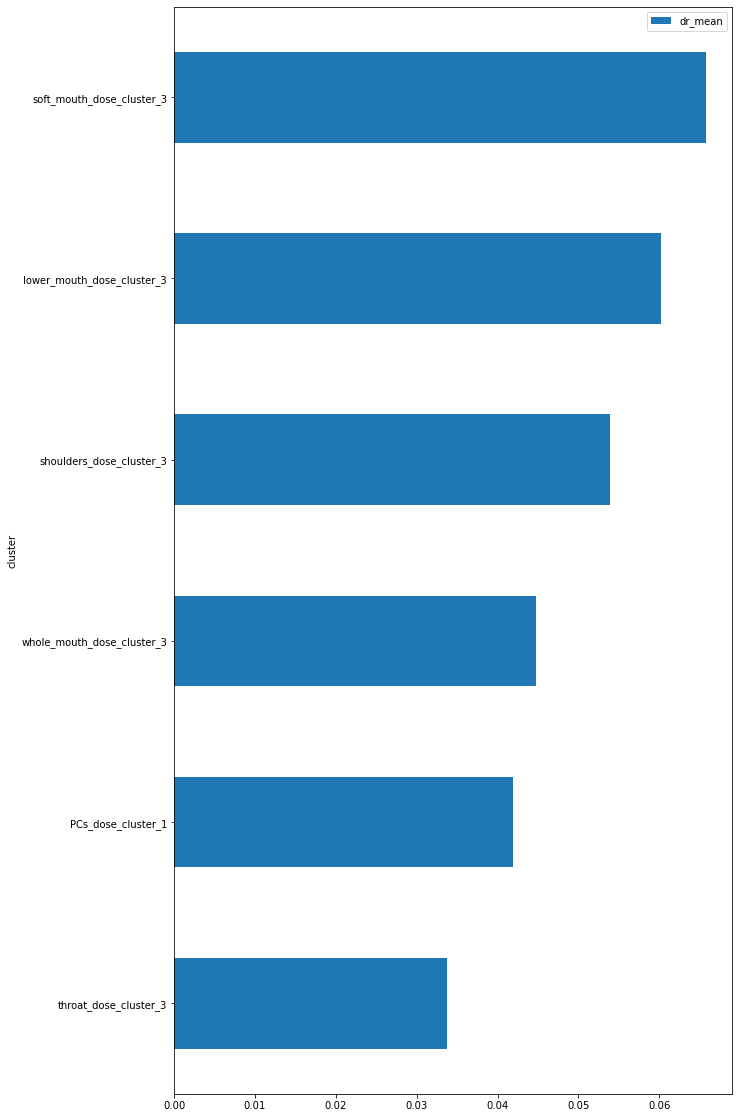

In [361]:
res_df[(res_df.outcome=='symptoms_drymouth_max_post')&(res_df.dr_v5 > 0)&(res_df.iptw_v5 > 0)&(res_df.threshold ==5 )].sort_values('dr_mean').plot(kind='barh',x='cluster',y='dr_mean',figsize=(10,20))

In [289]:
res_df2 = pd.read_csv(Const.data_dir+'ate_results_2272022.csv')
res_df2[res_df2.iptw_sig & res_df2.matching_sig & (res_df2.iptw_mean > 0)].sort_values('iptw_mean',ascending=False)

,cluster,outcome,iptw_v5,iptw_mean,iptw_v95,iptw_sig,matching_v5,matching_mean,matching_v95,matching_sig,threshold
288,upper_mouth_dose_cluster_0,symptoms_mucositis_max_treatment,0.951096,1.080510,1.268550,True,0.198930,0.329751,0.414812,True,5
284,upper_mouth_dose_cluster_0,symptoms_mucositis_max_treatment,0.916160,1.068658,1.322779,True,0.214017,0.330241,0.411317,True,3
195,PCs_dose_cluster_3,symptoms_drymouth_max_treatment,0.161776,0.434268,0.598682,True,0.070068,0.160700,0.224439,True,3
704,upper_mouth_dose_cluster_0,symptoms_pain_max_treatment,0.187687,0.407773,0.619942,True,0.068498,0.389519,0.630576,True,5
700,upper_mouth_dose_cluster_0,symptoms_pain_max_treatment,0.202355,0.406878,0.596098,True,0.020357,0.352402,0.700043,True,3
517,throat_dose_cluster_1,symptoms_mucus_max_post,0.142406,0.395231,0.656281,True,0.085989,0.273829,0.462173,True,5
199,PCs_dose_cluster_3,symptoms_drymouth_max_treatment,0.168168,0.387866,0.633487,True,0.059337,0.142276,0.234366,True,5
513,throat_dose_cluster_1,symptoms_mucus_max_post,0.151831,0.373018,0.647632,True,0.041823,0.241828,0.513307,True,3
545,thoat_alt_dose_cluster_1,symptoms_mucus_max_post,0.127203,0.371724,0.593087,True,0.023780,0.255565,0.497377,True,3
727,throat_dose_cluster_3,symptoms_pain_max_treatment,0.250030,0.353237,0.455264,True,0.096553,0.197405,0.307892,True,5


In [291]:
res_df2[res_df2.iptw_sig & (res_df2.iptw_mean > 0) & res_df2.outcome.apply(lambda x: 'post' in x)].sort_values('iptw_mean',ascending=False)

,cluster,outcome,iptw_v5,iptw_mean,iptw_v95,iptw_sig,matching_v5,matching_mean,matching_v95,matching_sig,threshold
517,throat_dose_cluster_1,symptoms_mucus_max_post,0.142406,0.395231,0.656281,True,0.085989,0.273829,0.462173,True,5
549,thoat_alt_dose_cluster_1,symptoms_mucus_max_post,0.125106,0.391266,0.621655,True,-0.032830,0.248792,0.491984,False,5
513,throat_dose_cluster_1,symptoms_mucus_max_post,0.151831,0.373018,0.647632,True,0.041823,0.241828,0.513307,True,3
545,thoat_alt_dose_cluster_1,symptoms_mucus_max_post,0.127203,0.371724,0.593087,True,0.023780,0.255565,0.497377,True,3
959,PCs_dose_cluster_3,symptoms_taste_max_post,0.164896,0.323646,0.534573,True,0.017966,0.131186,0.228787,True,3
963,PCs_dose_cluster_3,symptoms_taste_max_post,0.114917,0.310655,0.536234,True,0.028621,0.129537,0.211944,True,5
947,shoulders_dose_cluster_3,symptoms_taste_max_post,0.140234,0.302158,0.459221,True,0.025621,0.114004,0.183578,True,5
943,shoulders_dose_cluster_3,symptoms_taste_max_post,0.142437,0.299194,0.488205,True,-0.007928,0.102575,0.206520,False,3
519,throat_dose_cluster_3,symptoms_mucus_max_post,0.167961,0.295925,0.407734,True,0.108336,0.227497,0.324487,True,5
515,throat_dose_cluster_3,symptoms_mucus_max_post,0.130277,0.286268,0.427532,True,0.078159,0.214758,0.342776,True,3


In [367]:
[c for c in sd_df.columns if 'digest' in c]

['M6_mbs_digest', 'baseline_mbs_digest', 'digest_increase']

In [370]:
sd_df[sd_df.M6_mbs_digest.apply(lambda x: not np.isnan(x))].loc[:,['baseline_mbs_digest','M6_mbs_digest']]

,baseline_mbs_digest,M6_mbs_digest
id,,
7,NaN,2.0
11,0.0,0.0
22,1.0,3.0
23,0.0,1.0
29,0.0,1.0
39,0.0,1.0
180,0.0,0.0
185,1.0,1.0
208,1.0,1.0
